In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv("C://Users/ctyrm/Downloads/online_shoppers_intention.csv")

In [3]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
#The information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<AxesSubplot:xlabel='Month'>

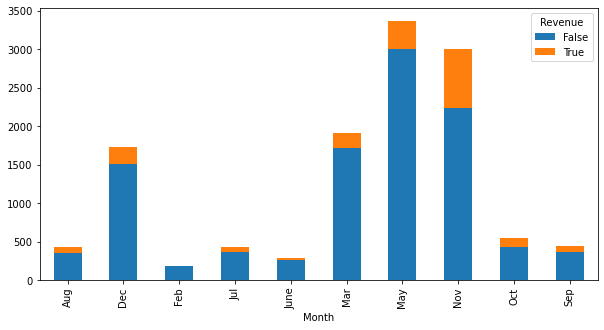

In [5]:
df.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5))

<AxesSubplot:xlabel='VisitorType'>

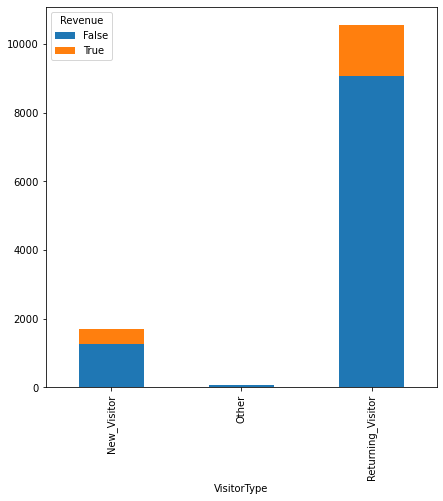

In [6]:
df.groupby('VisitorType')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7, 7))

<AxesSubplot:ylabel='Revenue'>

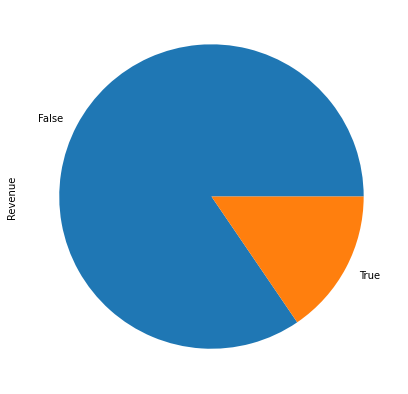

In [7]:
df['Revenue'].value_counts().plot.pie(y='Revenue', figsize=(7, 7))

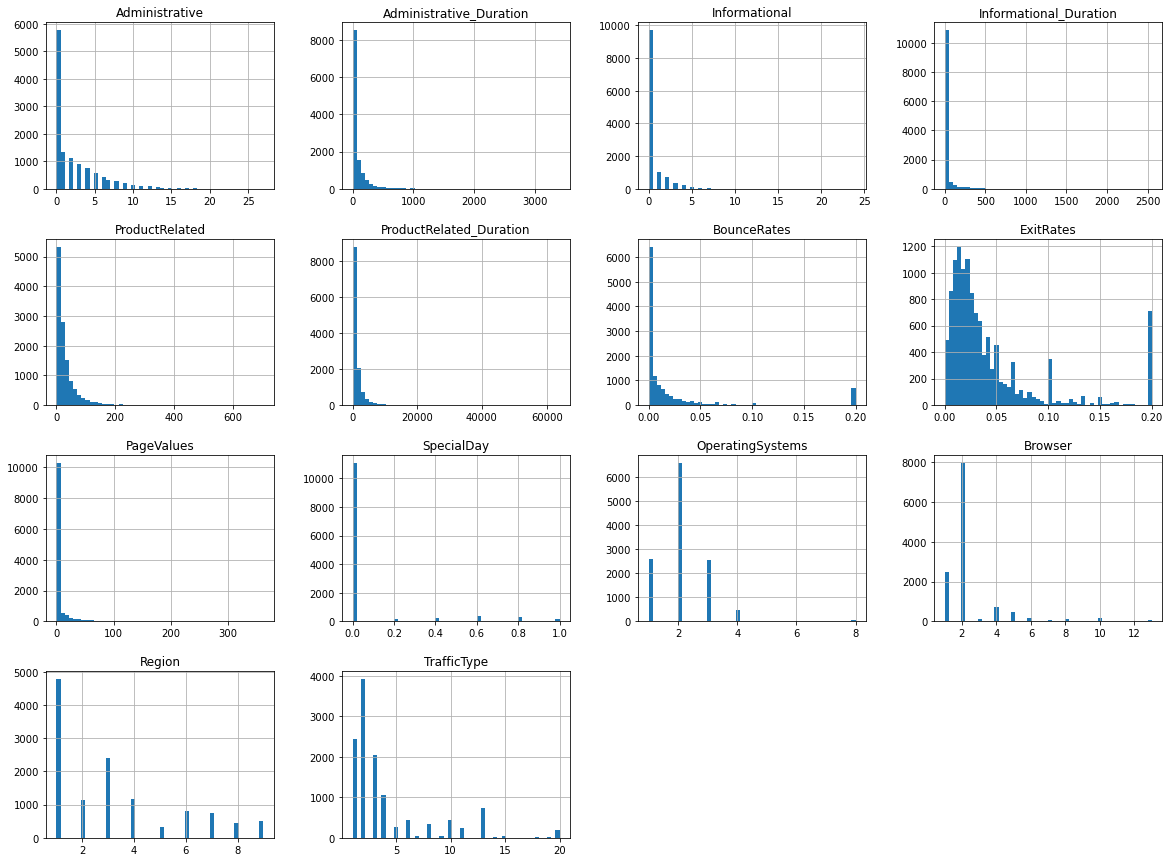

In [8]:
#Distribution of columns
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
#Transfom the time and the type variables 
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

In [10]:
#Checking the null value
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<AxesSubplot:>

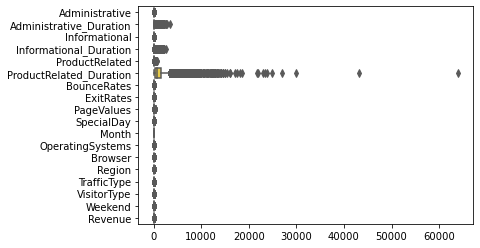

In [11]:
#Using the boxplot to find outliter
sns.boxplot(data=df, orient="h", palette="Set2")

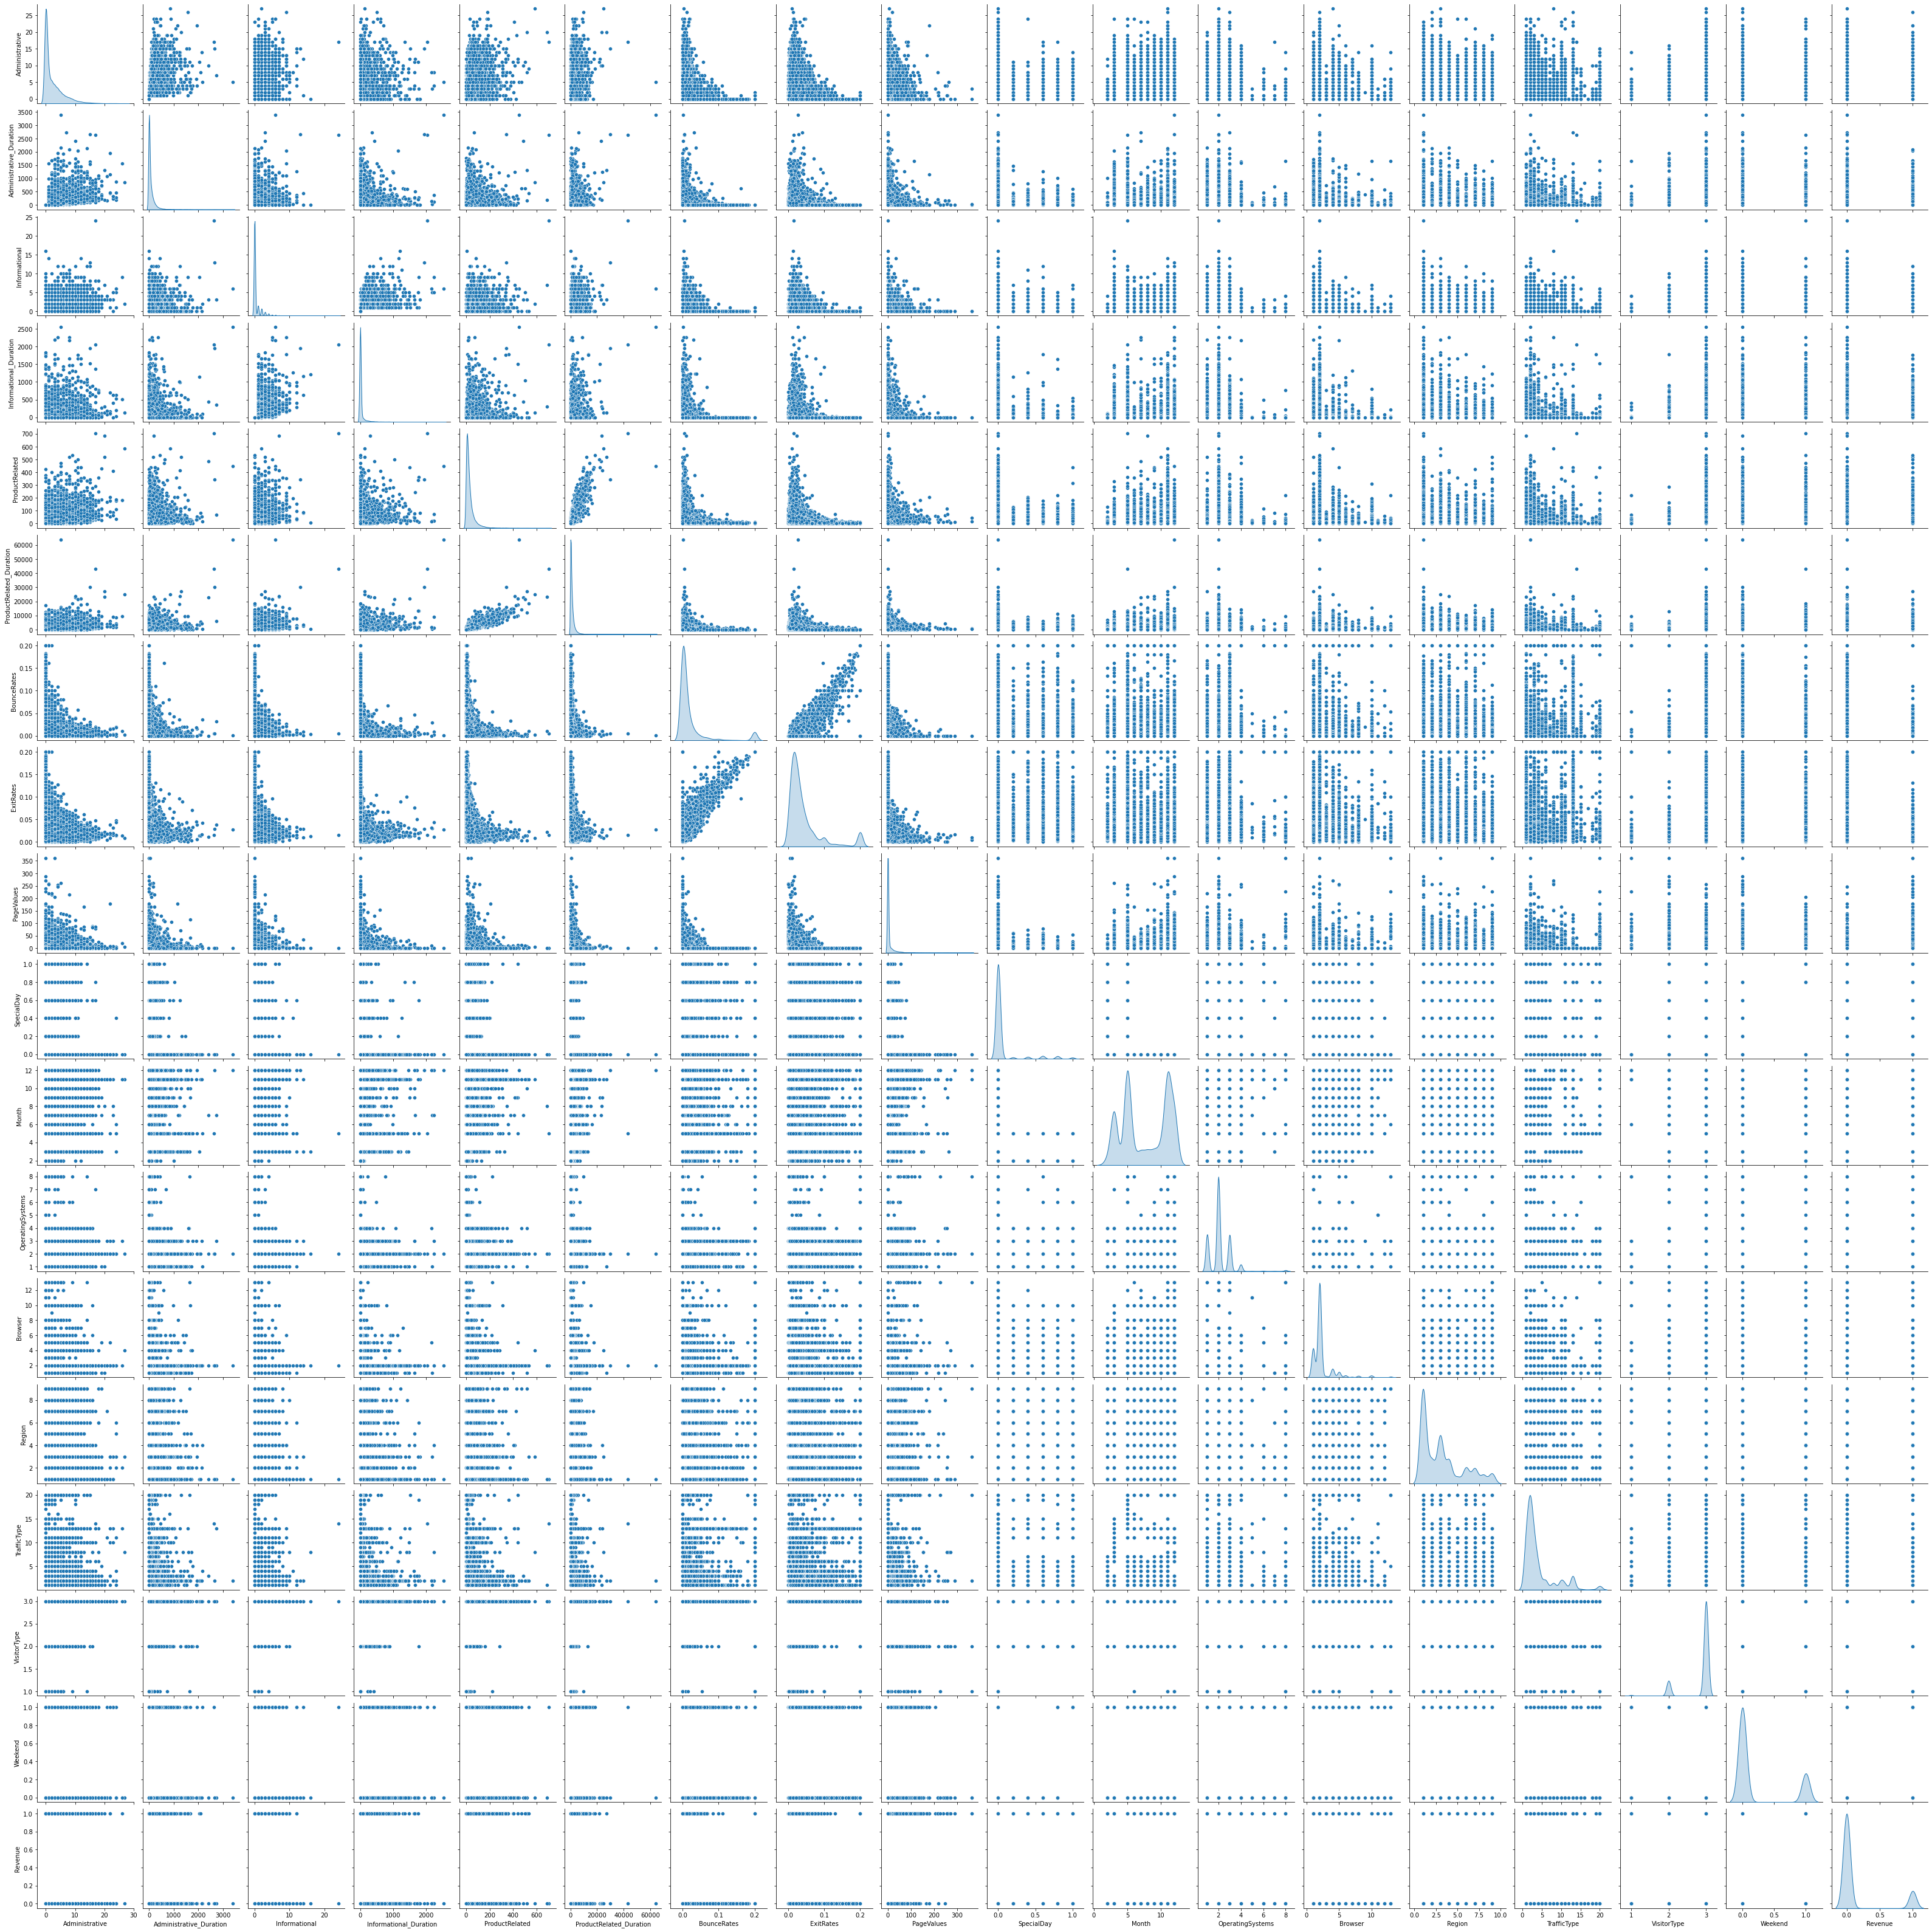

In [12]:
#Using Bi-Variate Analysis to understand the relationship between variables
sns.pairplot(df,diag_kind='kde')

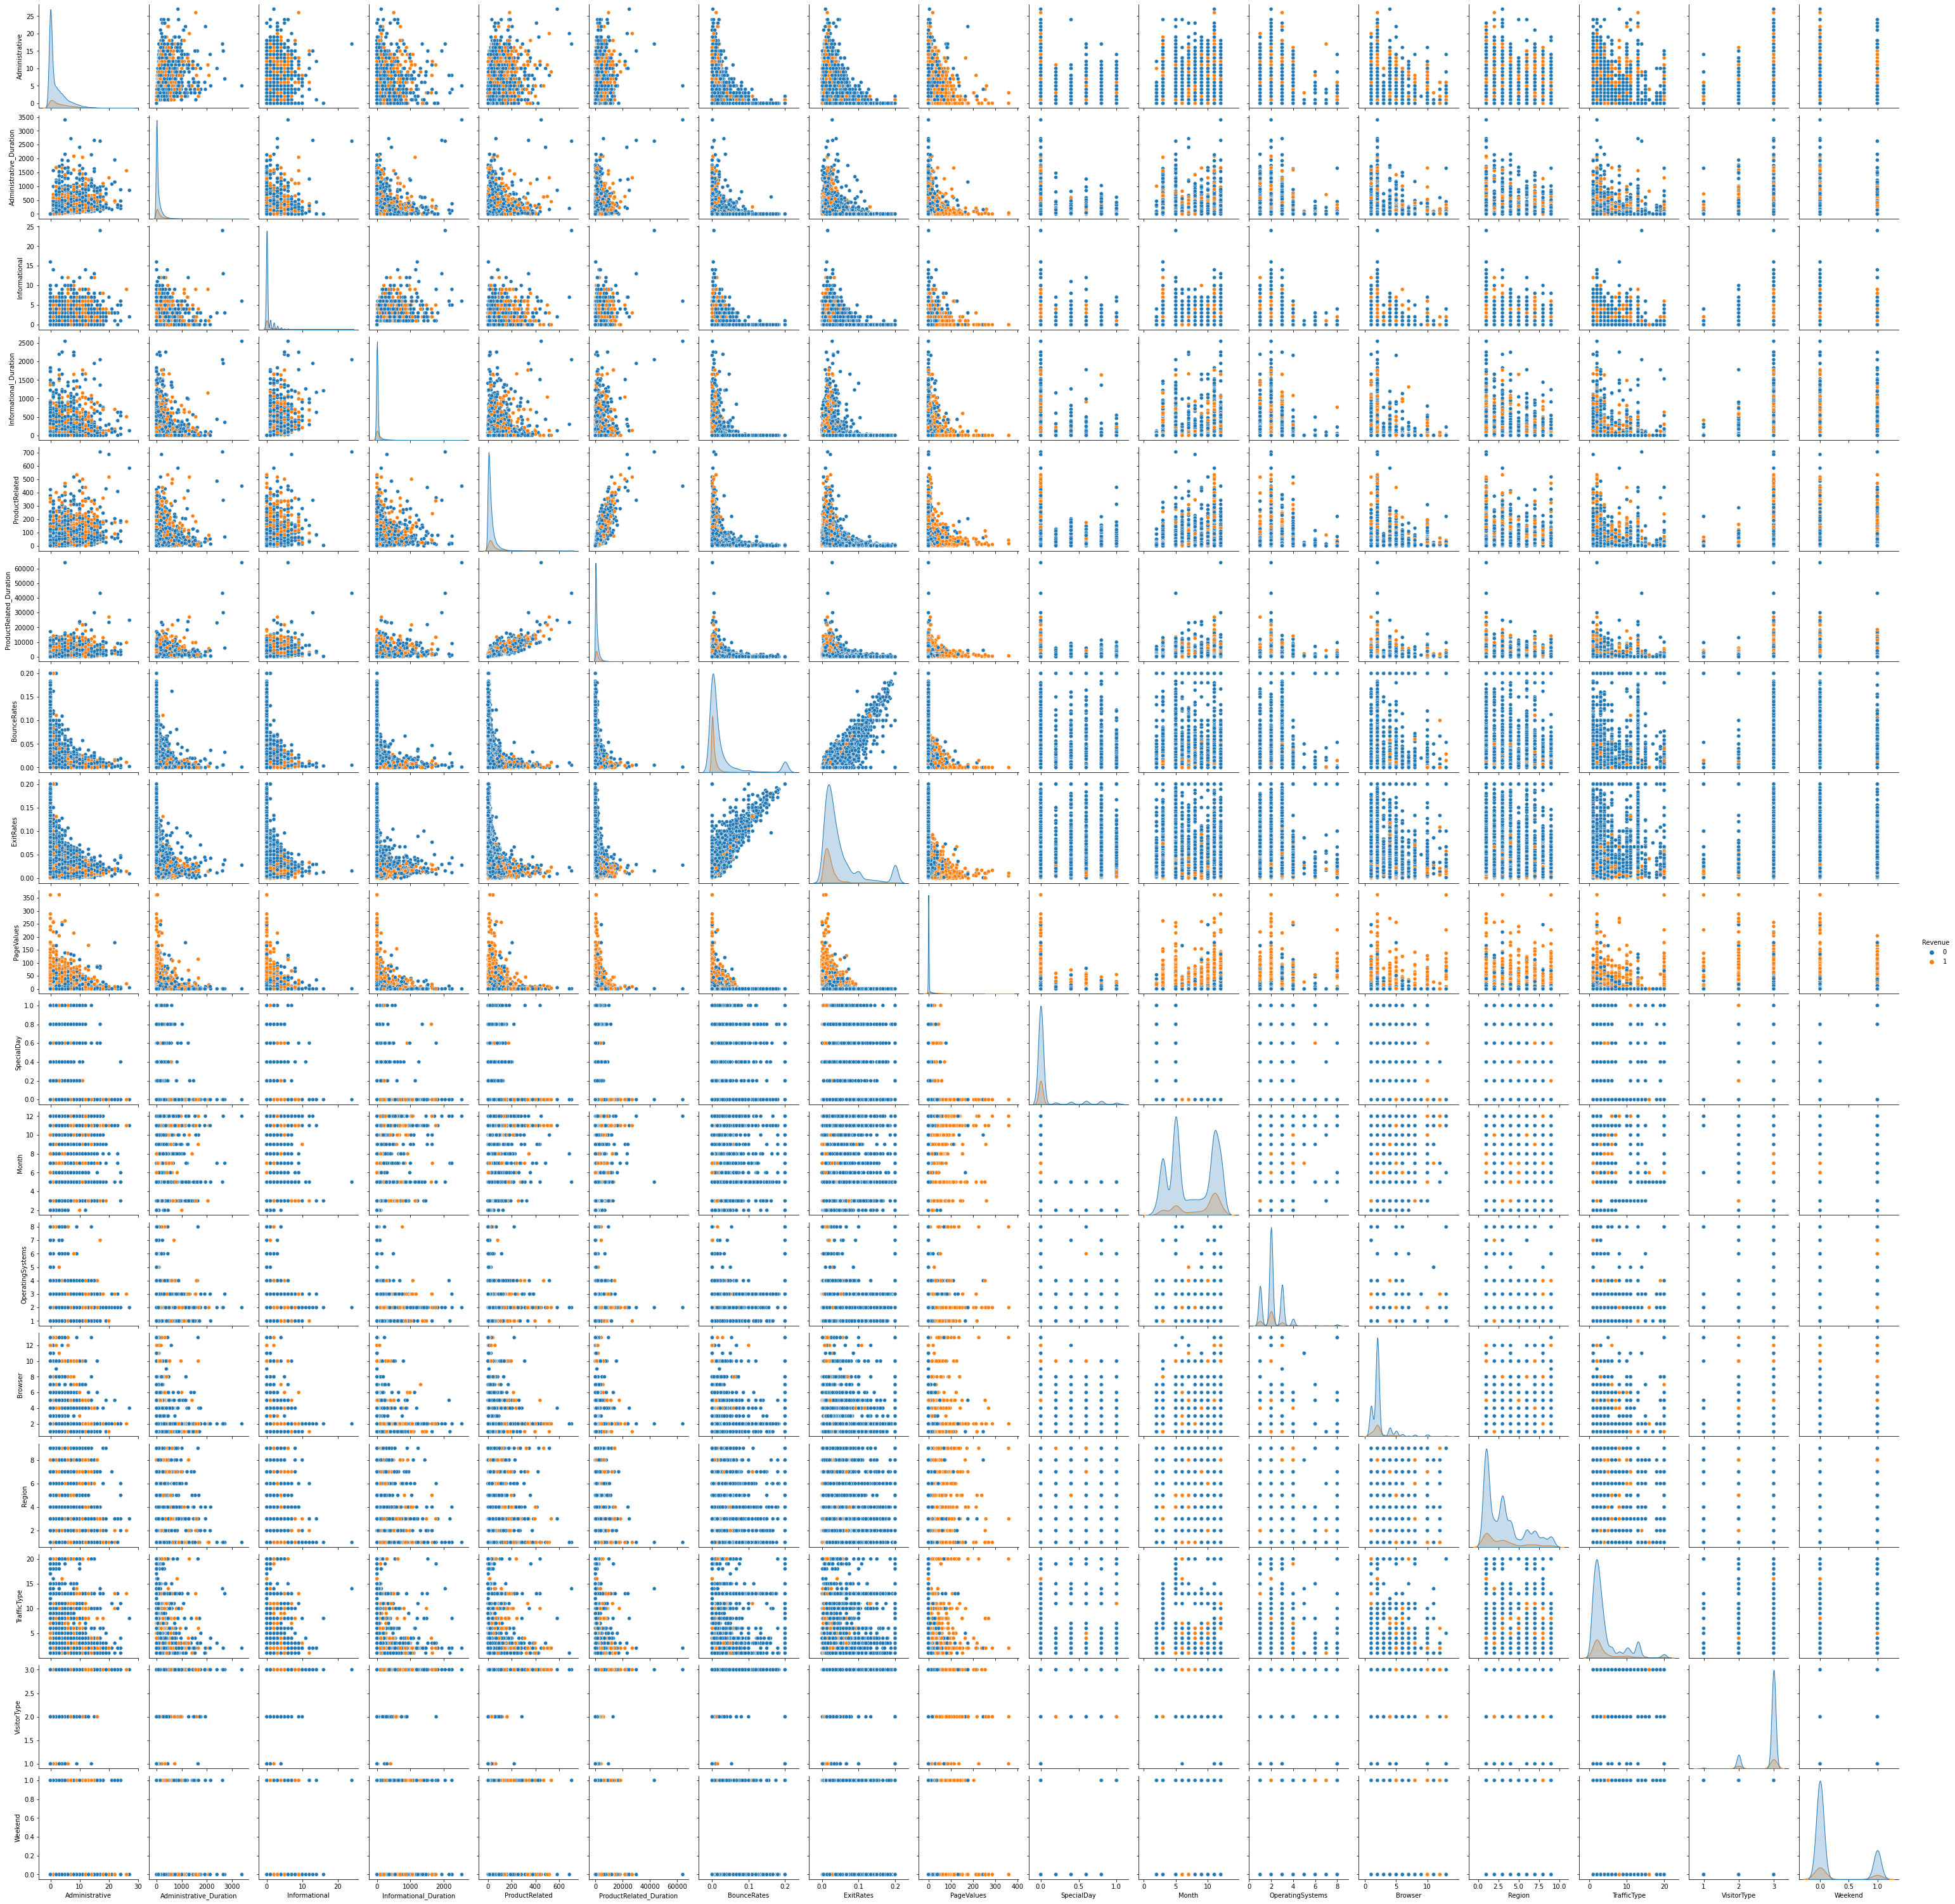

In [13]:
sns.pairplot(df,hue='Revenue')

In [14]:
#Using Interquartile Range (IQR) to check outlier
prd=df['ProductRelated_Duration']
percentile=np.percentile(prd,(25,50,75),interpolation='midpoint')
q1=percentile[0]
q3=percentile[2]
IQR=q3-q1
ulim=q3+1.5*IQR
llim=q1-1.5*IQR

outliter_prd=[]
for i in range(len(prd)):
    if (prd[i] < llim or prd[i] > ulim):
        outliter_prd.append(prd[i])
print(outliter_prd)


[4084.393939, 6951.972222, 5062.213753, 3556.61241, 5188.5, 5220.083333, 3658.5, 4105.666667, 3510.879903, 5042.458059, 4547.166667, 3608.9, 3410.875, 11301.20416, 4233.4807, 6255.017866, 5958.071931, 5485.105556, 3726.333333, 6682.677557, 12983.78771, 5818.916667, 4699.277778, 3909.36829, 3960.646154, 6770.274267, 3506.166667, 7221.0, 4566.952839, 8646.0, 3486.690476, 5900.351378, 7669.250794, 3552.702381, 3763.166667, 4346.541667, 7533.272727, 3946.008333, 3424.583333, 4099.737392, 4261.842857, 4163.797619, 6737.271825, 8961.407671, 4114.083333, 3641.213151, 5764.366667, 4996.666667, 3644.752381, 4056.175369, 4270.141667, 9128.283883, 9694.260714, 3888.166667, 3484.233333, 3451.751515, 4053.092208, 5186.116667, 3537.991667, 5349.563713, 4891.972222, 4764.429997, 4990.959524, 4164.936905, 6860.632738, 4895.022989, 13158.66667, 5198.533333, 4093.430519, 3882.025758, 4207.666667, 4656.800366, 5378.045851, 4639.410534, 6254.420122, 4945.083333, 5538.916667, 3864.428571, 5284.765079, 7009

In [15]:
#Describe avout the data
df. describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay         Month  \
count  12330.000000  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427      7.651987   
std        0.048488      0.048597     18.568437      0.198917      3.392841   
min        0.000000      0.000000      0.000000      0.000000      2.000000   
25%        0.000000      0.014286      0.000000      0.000000      5.000000   
50%        0.003112      0.025156      0.000000      0.000000      7.000000   
75%        0.016813      0.050000      0.000000      0.000000     11.000000   
max        0.200000      0.200000    361.763742      1.000000     12.000000   

       OperatingSystems       Browser        Region   TrafficType  \
count      12330.000000  12330.000000  12330.000000  12330.000000   
mean           2.124006      2.357097      3.147364      4.069586   
std            0.911325      1.717277      2.401591      4.025169   
min            1.000000      1.000000      1.000000      1.000000   
25%            2.000000      2.000000      1.000000      2.000000   
50%            2.000000      2.000000      3.000000      2.000000   
75%            3.000000      2.000000      4.000000      4.000000   
max            8.000000     13.000000      9.000000     20.000000   

        VisitorType       Weekend       Revenue  
count  12330.000000  12330.000000  12330.000000  
mean       2.848824      0.232603      0.154745  
std        0.376989      0.422509      0.361676  
min        1.000000      0.000000      0.000000  
25%        3.000000      0.000000      0.000000  
50%        3.000000      0.000000      0.000000  
75%        3.000000      0.000000      0.000000  
max        3.000000      1.000000      1.000000

<AxesSubplot:>

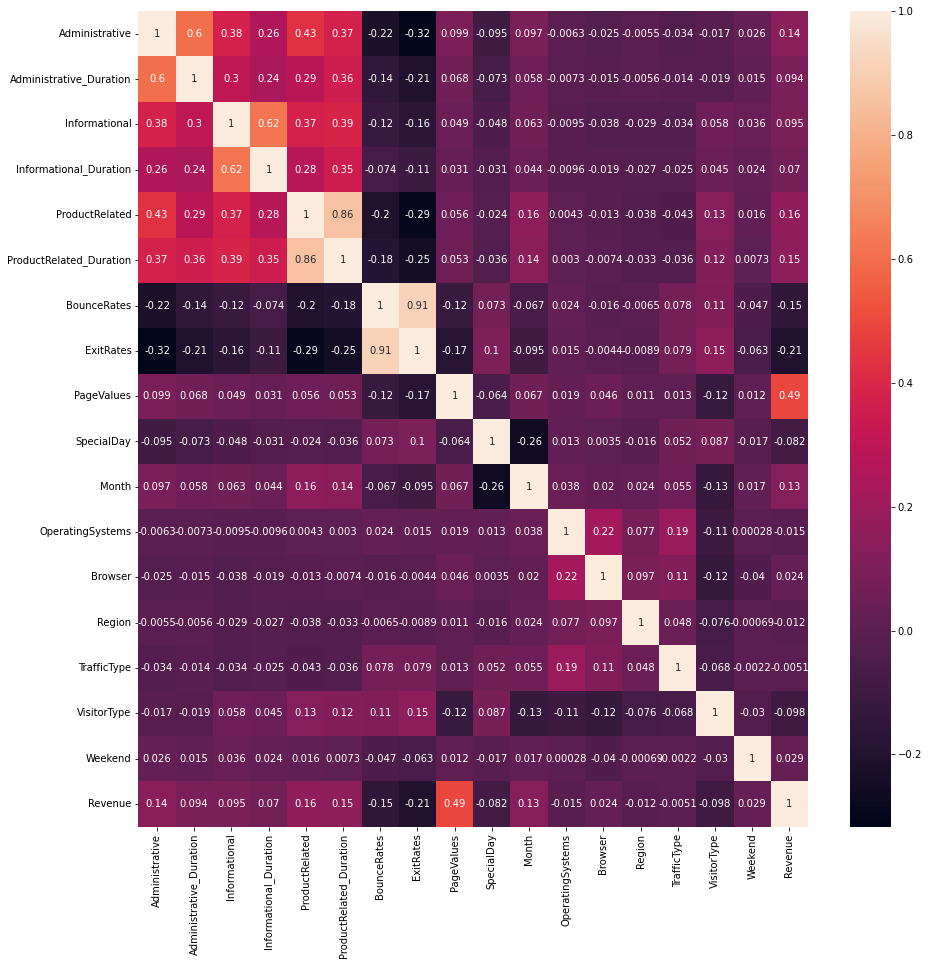

In [16]:
# Visualizing the correlation
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
Month                      0.127372
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
VisitorType               -0.098485
Weekend                    0.029295
Name: Revenue, dtype: float64


<AxesSubplot:>

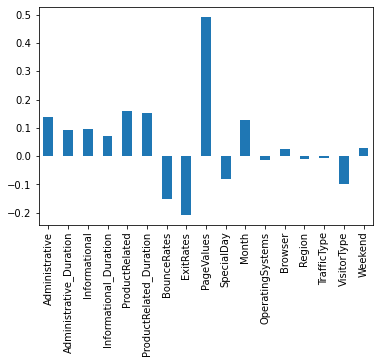

In [17]:
correlations = df.corr()['Revenue'].drop('Revenue')
print(correlations)
correlations.plot(kind='bar')

In [18]:
#Standardize the data
scaler = StandardScaler() 
  
scaler.fit(df.drop('Revenue', axis = 1)) 
scaled_features = scaler.transform(df.drop('Revenue', axis = 1)) 
  
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1]) 
df_feat.head() 

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay     Month  OperatingSystems  \
0     3.667189   3.229316   -0.317178   -0.308821 -1.665924         -1.233426   
1    -0.457683   1.171473   -0.317178   -0.308821 -1.665924         -0.136078   
2     3.667189   3.229316   -0.317178   -0.308821 -1.665924          2.058618   
3     0.573535   1.994610   -0.317178   -0.308821 -1.665924          0.961270   
4    -0.045196   0.142551   -0.317178   -0.308821 -1.665924          0.961270   

    Browser    Region  TrafficType  VisitorType   Weekend  
0 -0.790293 -0.894178    -0.762629     0.401025 -0.550552  
1 -0.207952 -0.894178    -0.514182     0.401025 -0.550552  
2 -0.790293  2.437081    -0.265735     0.401025 -0.550552  
3 -0.207952 -0.477771    -0.017289     0.401025 -0.550552  
4  0.374389 -0.894178    -0.017289     0.401025  1.816360

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3132
           1       0.65      0.40      0.49       567

    accuracy                           0.88      3699
   macro avg       0.78      0.68      0.71      3699
weighted avg       0.86      0.88      0.86      3699



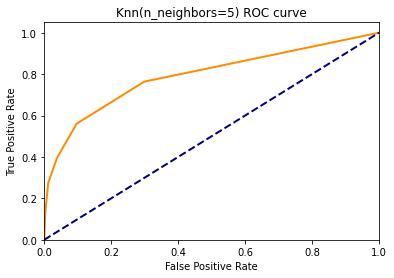

In [19]:
# KNN algorithm when K = 5
X_train, X_test, y_train, y_test = train_test_split( 
      scaled_features, df['Revenue'], test_size = 0.30) 
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, y_train) 
predicted = knn.predict(X_test)
print(classification_report(y_test, predicted)) 
predict_p=knn.predict_proba(X_test)
y_pred = predict_p[:,1]
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.title('Knn(n_neighbors=5) ROC curve')
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

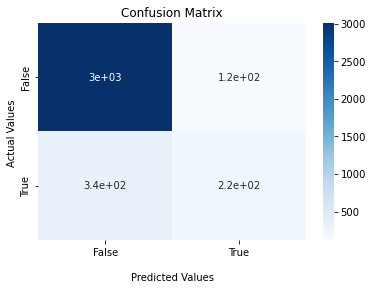

In [20]:
ax = sns.heatmap(confusion_matrix(y_test, predicted), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

Max train score 100.0 % and k = [1]
Max test score 87.91565287915653 % and k = [12, 14]


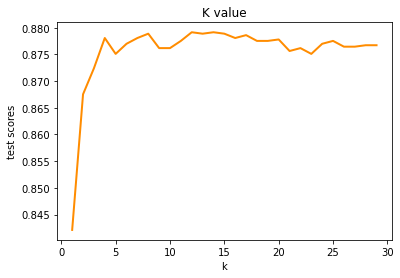

In [31]:
# Finding the best K Neighbors value
test_scores = []
train_scores = []
k=[]
for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    k.append(i)
max_train_score = max(train_scores)
m_k1 = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, m_k1))))
max_test_score = max(test_scores)
m_k2 = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, m_k2))))
plt.figure();
plt.plot(k, test_scores, color='darkorange', lw=2);
plt.plot(color='navy', lw=2, linestyle='--');
plt.title('K value')
plt.xlabel('k');
plt.ylabel('test scores');

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3132
           1       0.74      0.32      0.45       567

    accuracy                           0.88      3699
   macro avg       0.82      0.65      0.69      3699
weighted avg       0.87      0.88      0.86      3699



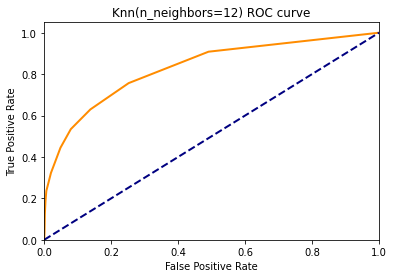

In [32]:
#Run the KNN model with the best K
knn = KNeighborsClassifier(n_neighbors =12) 
knn.fit(X_train, y_train) 
predicted = knn.predict(X_test)
print(classification_report(y_test, predicted)) 
predict_p=knn.predict_proba(X_test)
y_pred = predict_p[:,1]
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.title('Knn(n_neighbors=12) ROC curve')
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

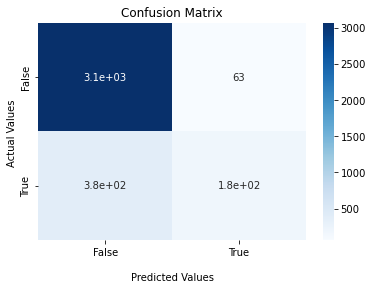

In [33]:
ax = sns.heatmap(confusion_matrix(y_test, predicted), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3132
           1       0.75      0.32      0.45       567

    accuracy                           0.88      3699
   macro avg       0.82      0.65      0.69      3699
weighted avg       0.87      0.88      0.86      3699



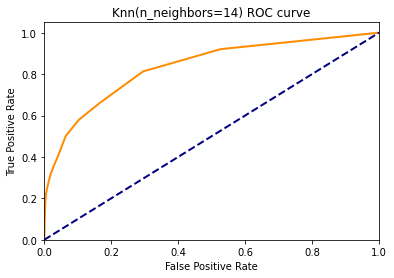

In [34]:
knn = KNeighborsClassifier(n_neighbors =14) 
knn.fit(X_train, y_train) 
predicted = knn.predict(X_test)
print(classification_report(y_test, predicted)) 
predict_p=knn.predict_proba(X_test)
y_pred = predict_p[:,1]
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.title('Knn(n_neighbors=14) ROC curve')
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

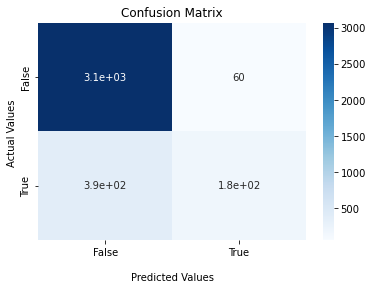

In [35]:
ax = sns.heatmap(confusion_matrix(y_test, predicted), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3132
           1       0.66      0.67      0.66       567

    accuracy                           0.90      3699
   macro avg       0.80      0.80      0.80      3699
weighted avg       0.90      0.90      0.90      3699



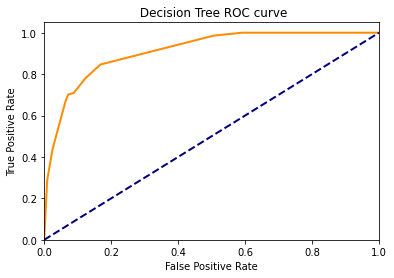

In [24]:
# Creating the Decision Tree model (Cart model)
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)
print(classification_report(y_test, predicted))
predict_p=dt.predict_proba(X_test)
y_pred = predict_p[:,1]
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.title(' Decision Tree ROC curve')
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

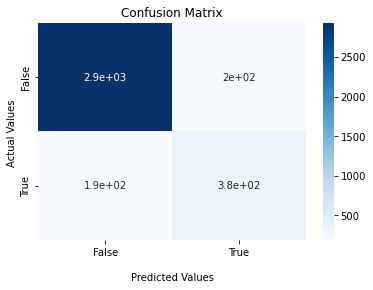

In [25]:
ax = sns.heatmap(confusion_matrix(y_test, predicted), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

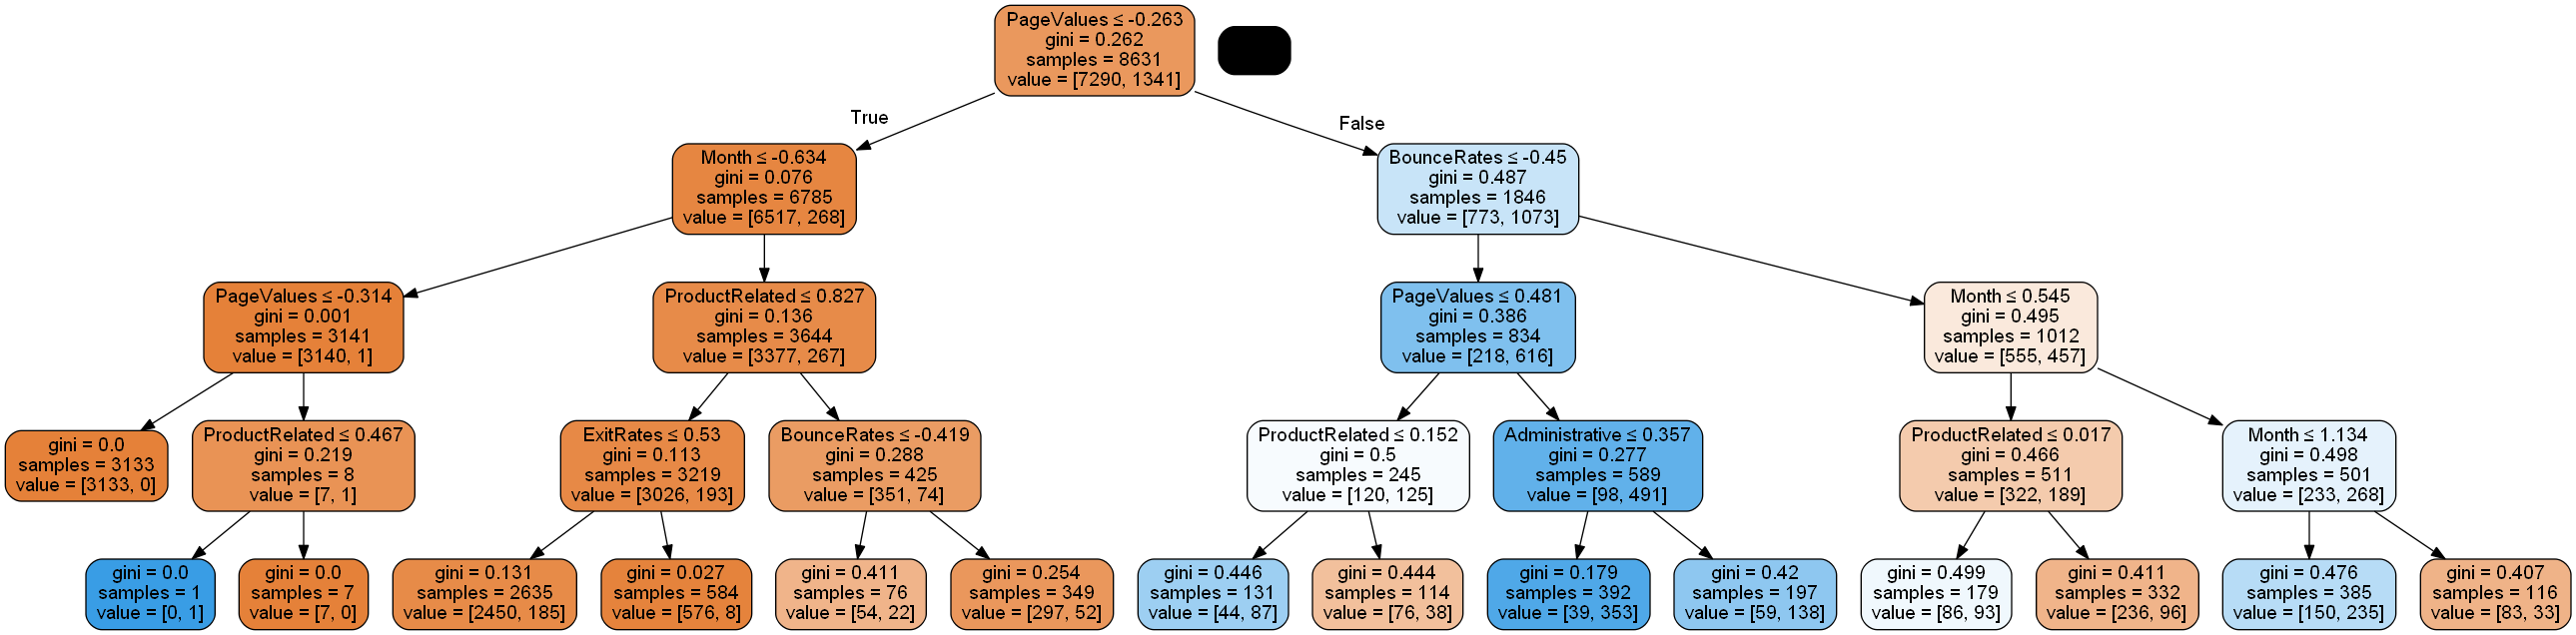

In [26]:
# Creat the tree graph about the Decision Tree model
import pydotplus
from six import StringIO
from sklearn import tree
from IPython.display import Image
features = df.drop('Revenue',axis=1).columns.tolist()
dot_data = StringIO()
tree.export_graphviz(dt,out_file=dot_data,feature_names=features,filled=True,rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 